In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df = df[['Age','EstimatedSalary','Purchased']]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [9]:
x_scaled.shape

(400, 2)

In [24]:
#whene you measure, which one is the faster to converge in the same number of epoch, Batch or stochastics, the answer is stochastics. then you have to comment below code, no need to split x and y.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
x_train.shape

(320, 2)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()

history = model.fit(x_scaled,y,epochs=50,batch_size=1,validation_split=0.2)
# history = model.fit(x_scaled,y,epochs=10,batch_size=320,validation_split=0.2) #--------> batch_size = 320(x_train.shape) neans it is Batch-GD
# history = model.fit(x_scaled,y,epochs=10,batch_size=1,validation_split=0.2) # --------> batch_size = 1 neans it is stochastic-GD 
print(time.time() - start)

#whih is faster?
#the answer is Batch-GD.

Epoch 1/50
320/320 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.8875 - val_loss: 0.2302 - val_accuracy: 0.9625
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.8844 - val_loss: 0.2229 - val_accuracy: 0.9500
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 0.2753 - accuracy: 0.8813 - val_loss: 0.2098 - val_accuracy: 0.9625
Epoch 4/50
320/320 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.8813 - val_loss: 0.2039 - val_accuracy: 0.9625
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.8844 - val_loss: 0.1983 - val_accuracy: 0.9625
Epoch 6/50
320/320 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.8813 - val_loss: 0.1995 - val_accuracy: 0.9625
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.8938 - val_loss: 0.1920 - val_accuracy: 0.9625
Epoch 

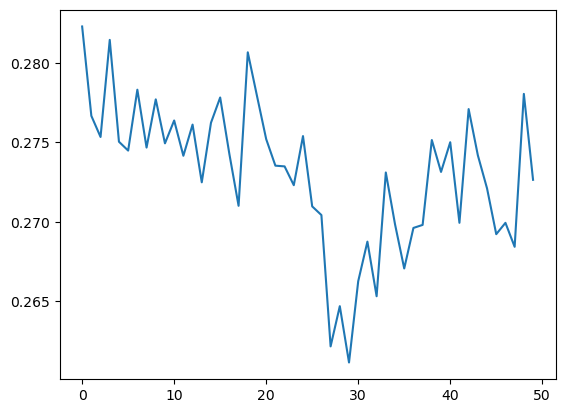

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [25]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(x_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 155ms/step - loss: 0.7153 - accuracy: 0.1937 - val_loss: 0.6796 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 45ms/step - loss: 0.7053 - accuracy: 0.2844 - val_loss: 0.6734 - val_accuracy: 0.5375
Epoch 3/10
2/2 [==============================] - 0s 41ms/step - loss: 0.6992 - accuracy: 0.4281 - val_loss: 0.6675 - val_accuracy: 0.5625
Epoch 4/10
2/2 [==============================] - 0s 52ms/step - loss: 0.6949 - accuracy: 0.5344 - val_loss: 0.6644 - val_accuracy: 0.6000
Epoch 5/10
2/2 [==============================] - 0s 49ms/step - loss: 0.6918 - accuracy: 0.5938 - val_loss: 0.6598 - val_accuracy: 0.6875
Epoch 6/10
2/2 [==============================] - 0s 52ms/step - loss: 0.6889 - accuracy: 0.6750 - val_loss: 0.6557 - val_accuracy: 0.7750
Epoch 7/10
2/2 [==============================] - 0s 51ms/step - loss: 0.6864 - accuracy: 0.7000 - val_loss: 0.6531 - val_accuracy: 0.8125
Epoch 8/10
2/2 [==========

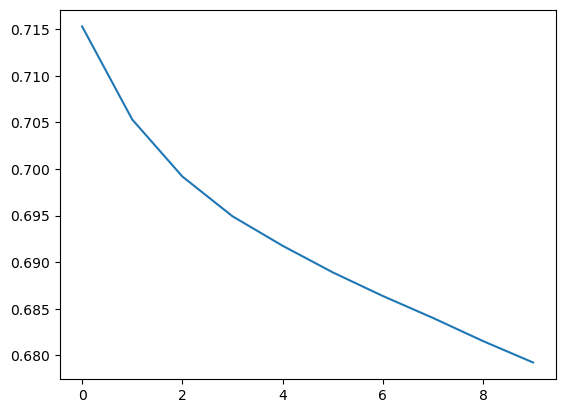

In [28]:
plt.plot(history.history['loss'])